In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy import stats

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
df = pd.read_csv("player_stats.csv", encoding='ISO-8859-1')

In [3]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

# Calculate Z-scores for each data point in the numerical columns
z_scores = stats.zscore(df[numerical_cols])

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Check if any Z-score exceeds the threshold in any numerical column
outliers_exist = (z_scores > threshold).any().any()

if outliers_exist:
    print("Outliers exist in the dataset.")
else:
    print("No outliers found in the dataset.")

Outliers exist in the dataset.


In [4]:
# Assume players whose goalkeeper-related columns are not null are goalkeepers
df['is_goalkeeper'] = df['gk_diving'].notnull().astype(int)
df

player   country  height  weight  age  \
0     Cristian Castro Devenish  Colombia     192      84   22   
1             Silaldo Taffarel    Brazil     181      80   31   
2                Thomas DÃ¤hne   Germany     193      84   29   
3            Michael Sollbauer   Austria     187      86   33   
4                Diego Segovia   Uruguay     191      80   23   
...                        ...       ...     ...     ...  ...   
5677             Mohamed Salah     Egypt     175      71   31   
5678                Sadio Mané   Senegal     174      69   31   
5679                 Neymar Jr    Brazil     175      68   31   
5680         Cristiano Ronaldo  Portugal     187      83   38   
5681        Zlatan Ibrahimovi?    Sweden     195     102   41   

                   club  ball_control  dribbling marking  slide_tackle  ...  \
0        Atl. Nacional             55         43     NaN            68  ...   
1          Corinthians             69         70     NaN            56  ...   
2        Holstein Kiel             25         12     NaN            13  ...   
3        SK Rapid Wien             46         48     NaN            66  ...   
4        Independiente             14          8     NaN            14  ...   
...                 ...           ...        ...     ...           ...  ...   
5677          Liverpool            86         88    None            41  ...   
5678  FC Bayern München            86         88    None            38  ...   
5679           Paris SG            94         95    None            29  ...   
5680           Al Nassr            87         81    None            24  ...   
5681              Milan            85         75    None            24  ...   

      fk_acc  penalties  volleys  gk_positioning  gk_diving  gk_handling  \
0         34         41       33              10         11            6   
1         62         48       46              12         15           14   
2         15         26       16              64         74           65   
3         13         22       19              10         10            8   
4         10         16        5              61         59           62   
...      ...        ...      ...             ...        ...          ...   
5677      69         86       83              11         14           14   
5678      64         75       75               7         10           10   
5679      87         91       86              15          9            9   
5680      75         90       85              14          7           11   
5681      74         80       87               9         13           15   

      gk_kicking  gk_reflexes         value  is_goalkeeper  
0              7            9    $1.400.000              1  
1              8           14      $975.00               1  
2             68           74    $1.100.000              1  
3             14            9      $650.00               1  
4             64           64      $300.00               1  
...          ...          ...           ...            ...  
5677           9           14   $99.500.000              1  
5678          15           14  $101.000.000              1  
5679          15           11   $99.500.000              1  
5680          15           11   $31.000.000              1  
5681          10           12   $10.500.000              1  

[5682 rows x 42 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player          5682 non-null   object
 1   country         5682 non-null   object
 2   height          5682 non-null   int64 
 3   weight          5682 non-null   int64 
 4   age             5682 non-null   int64 
 5   club            5682 non-null   object
 6   ball_control    5682 non-null   int64 
 7   dribbling       5682 non-null   int64 
 8   marking         5524 non-null   object
 9   slide_tackle    5682 non-null   int64 
 10  stand_tackle    5682 non-null   int64 
 11  aggression      5682 non-null   int64 
 12  reactions       5682 non-null   int64 
 13  att_position    5682 non-null   int64 
 14  interceptions   5682 non-null   int64 
 15  vision          5682 non-null   int64 
 16  composure       5682 non-null   int64 
 17  crossing        5682 non-null   int64 
 18  short_pa

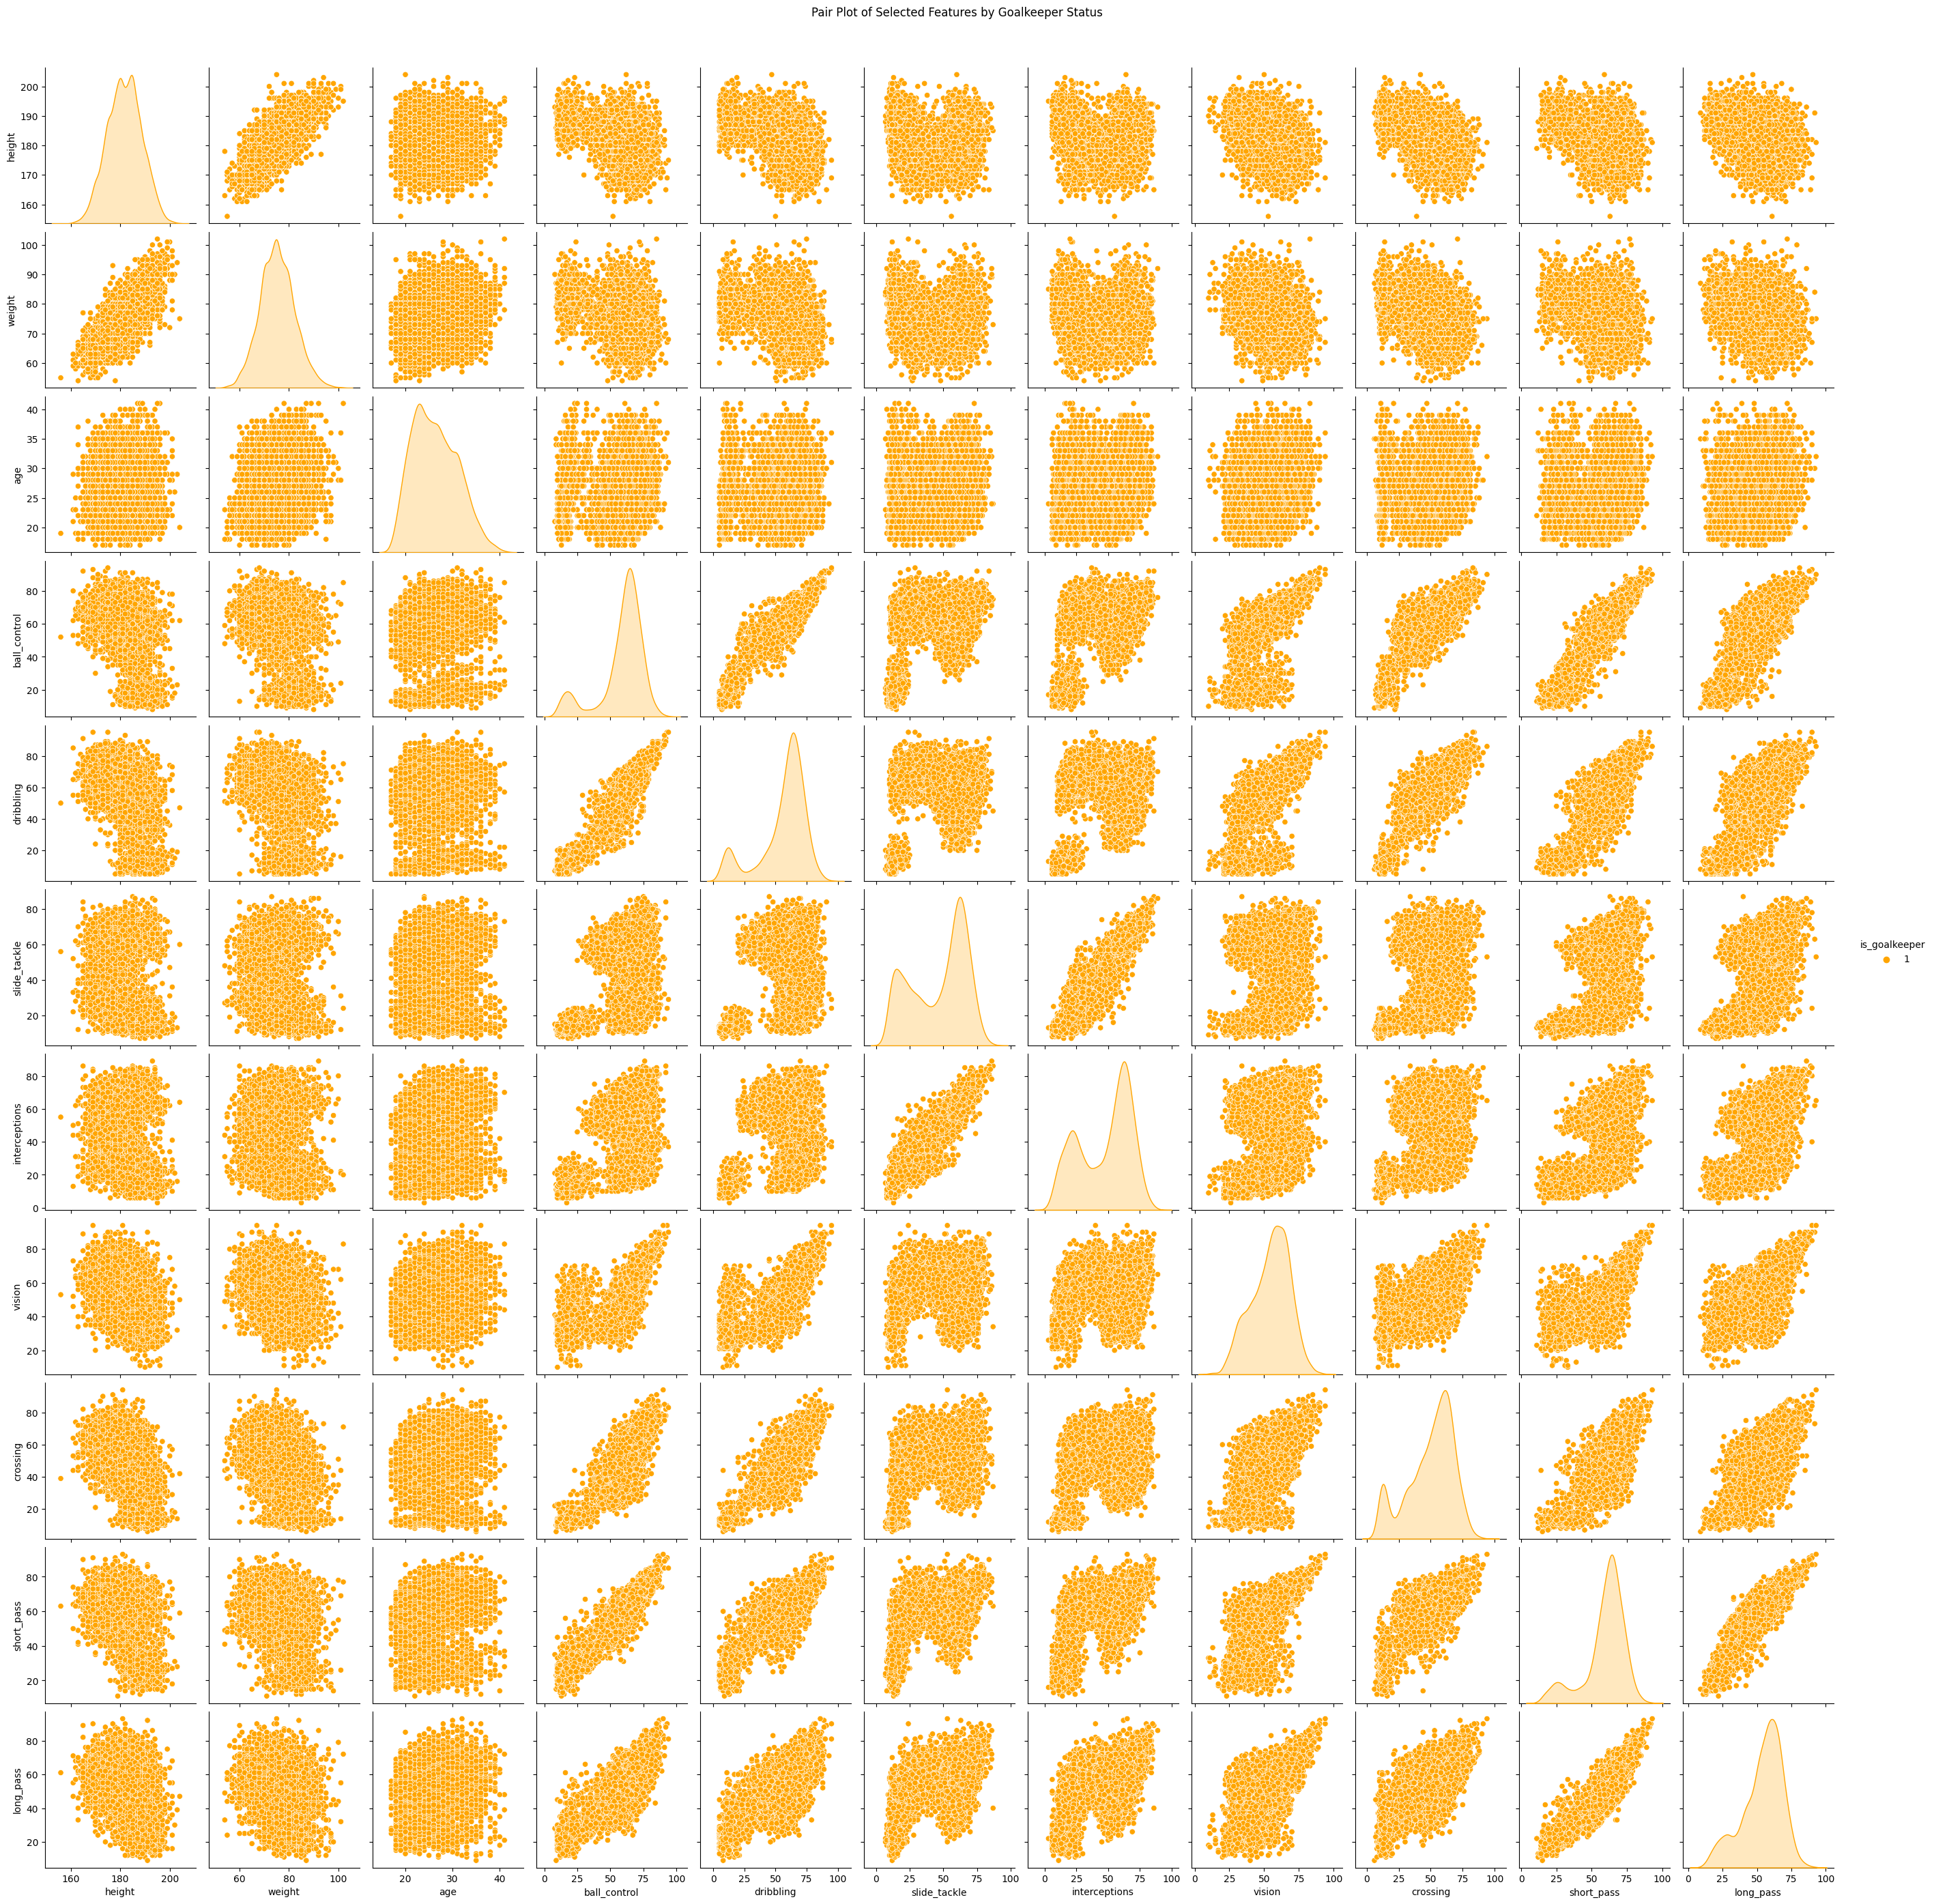

In [6]:
# Select relevant columns for pair plot
selected_columns = ['height', 'weight', 'age', 'ball_control', 'dribbling', 
                    'slide_tackle','interceptions', 'vision', 
                    'crossing', 'short_pass', 'long_pass']

# Add 'is_goalkeeper' for color differentiation
selected_columns.append('is_goalkeeper')

# Subset the dataframe with selected columns
df_subset = df[selected_columns]

# Plot pair plot
sns.pairplot(df_subset, hue='is_goalkeeper', palette={0: 'blue', 1: 'orange'})
plt.suptitle('Pair Plot of Selected Features by Goalkeeper Status', y=1.02)
plt.show()

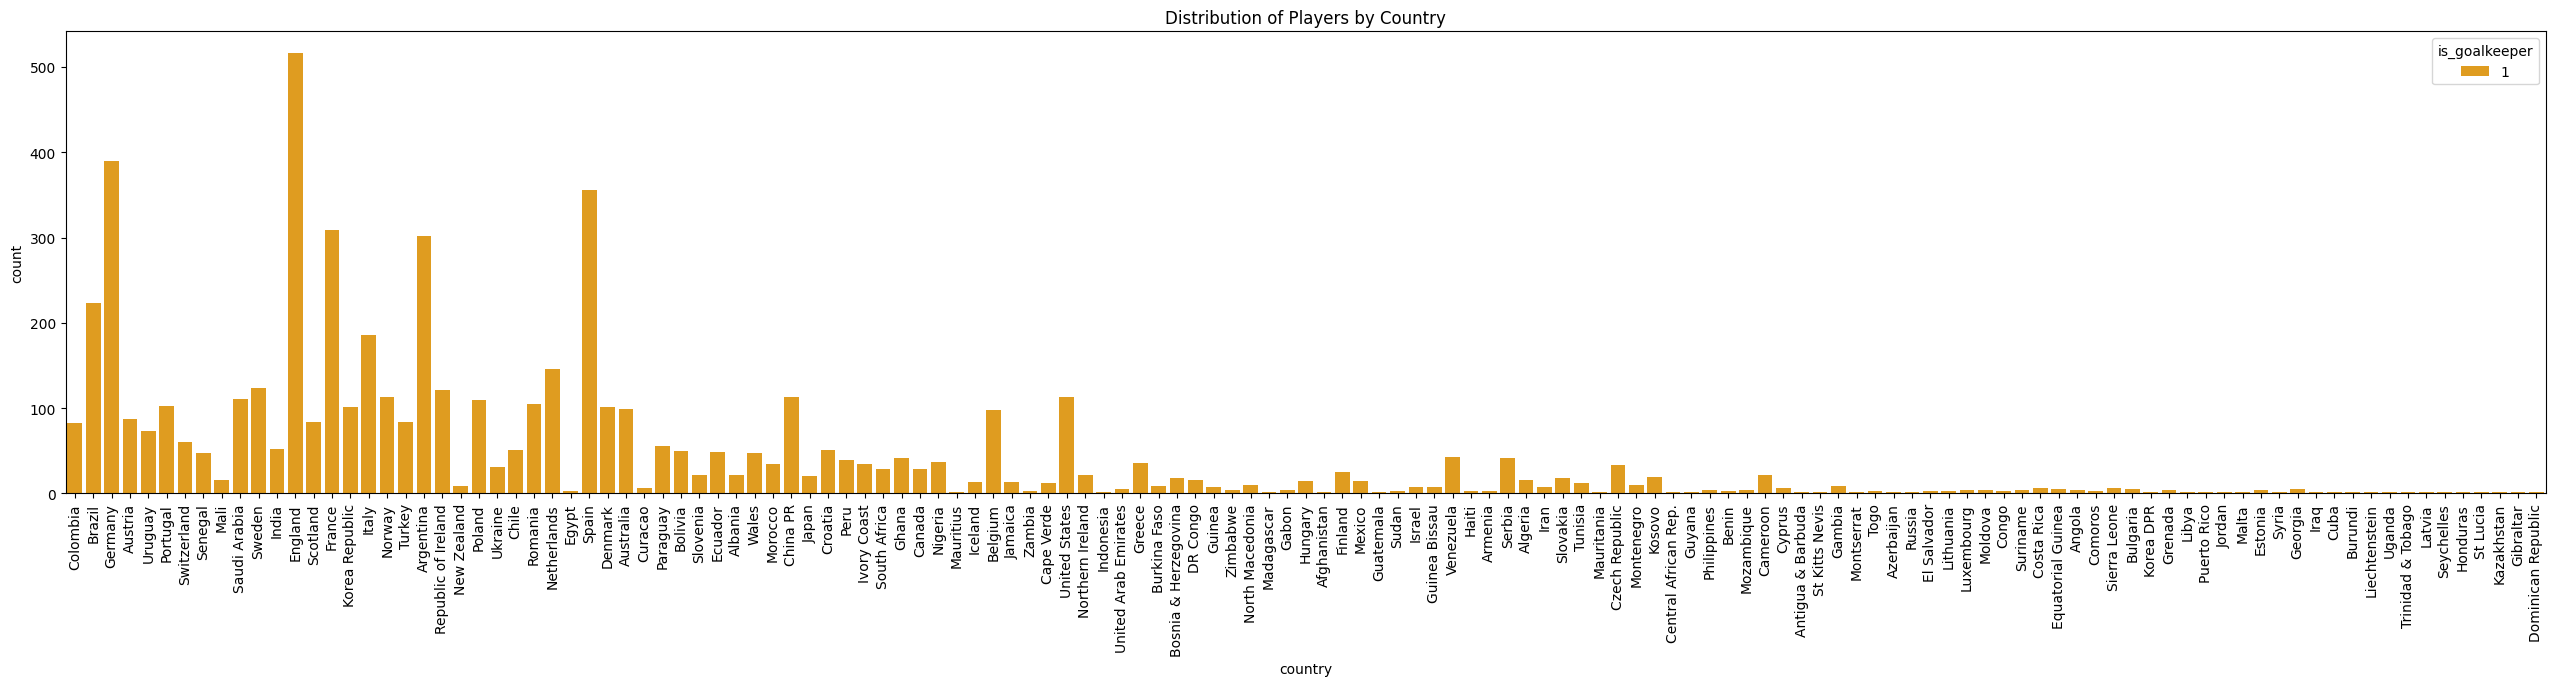

In [7]:
# Count plot for 'country'
plt.figure(figsize=(32, 6))
sns.countplot(x='country', data=df, hue='is_goalkeeper', palette={0: 'blue', 1: 'orange'})
plt.title('Distribution of Players by Country')
plt.xticks(rotation=90)
plt.show()



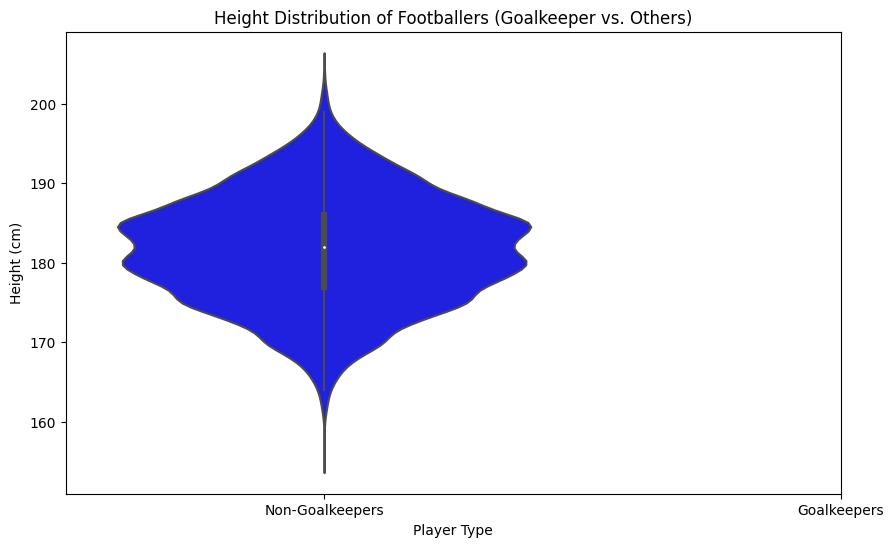

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='is_goalkeeper', y='height', data=df, palette=['blue', 'orange'], split=True)
plt.title('Height Distribution of Footballers (Goalkeeper vs. Others)')
plt.xlabel('Player Type')
plt.ylabel('Height (cm)')
plt.xticks([0, 1], ['Non-Goalkeepers', 'Goalkeepers'])
plt.show()


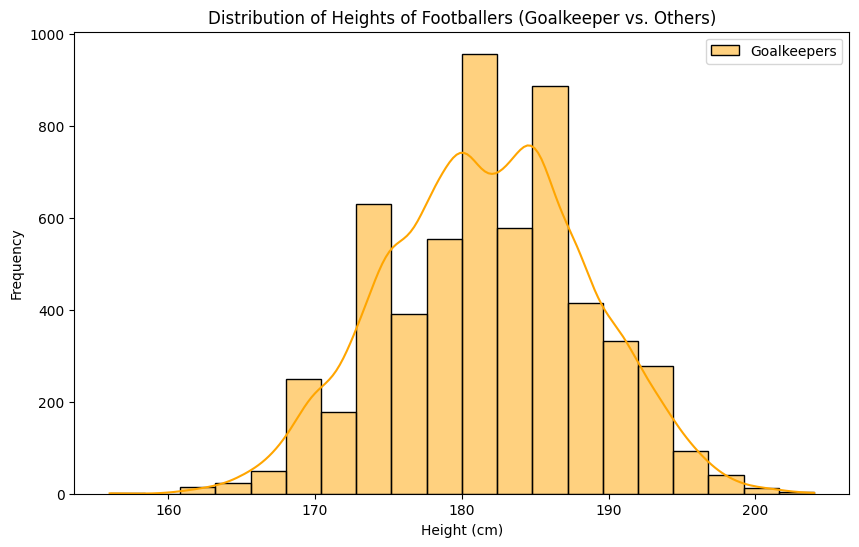

In [9]:
# Visualization: Distribution of Heights
plt.figure(figsize=(10, 6))
sns.histplot(df[df['is_goalkeeper'] == 0]['height'], bins=20, kde=True, color='blue', label='Non-Goalkeepers')
sns.histplot(df[df['is_goalkeeper'] == 1]['height'], bins=20, kde=True, color='orange', label='Goalkeepers')
plt.title('Distribution of Heights of Footballers (Goalkeeper vs. Others)')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your original dataset
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

# Identify object columns
object_cols = df.select_dtypes(include=['object']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale numerical columns
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display or use the scaled DataFrame
print(df_scaled)

                        player   country    height    weight       age  \
0     Cristian Castro Devenish  Colombia  1.512668  1.245679 -0.912616   
1             Silaldo Taffarel    Brazil -0.098195  0.674116  0.990314   
2                Thomas DÃ¤hne   Germany  1.659110  1.245679  0.567440   
3            Michael Sollbauer   Austria  0.780458  1.531461  1.413187   
4                Diego Segovia   Uruguay  1.366226  0.674116 -0.701179   
...                        ...       ...       ...       ...       ...   
5677             Mohamed Salah     Egypt -0.976848 -0.611900  0.990314   
5678                Sadio Mané   Senegal -1.123290 -0.897682  0.990314   
5679                 Neymar Jr    Brazil -0.976848 -1.040572  0.990314   
5680         Cristiano Ronaldo  Portugal  0.780458  1.102788  2.470369   
5681        Zlatan Ibrahimovi?    Sweden  1.951995  3.817712  3.104679   

                   club  ball_control  dribbling marking  slide_tackle  ...  \
0        Atl. Nacional      -0.2

In [11]:
# Data Preprocessing: Remove null values and label encode
df.fillna(0, inplace=True)
le = LabelEncoder()

In [12]:
# Label encode columns with 'object' data type
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    df[column] = le.fit_transform(df[column].astype(str))


In [13]:
# Split the dataset into features (X) and target variable (y) for goalkeeper prediction
X_goalkeeper = df[['height', 'weight', 'age', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']]
y_goalkeeper = df['is_goalkeeper']

In [14]:
# Split the data for goalkeeper prediction into training and testing sets
X_goalkeeper_train, X_goalkeeper_test, y_goalkeeper_train, y_goalkeeper_test = train_test_split(
    X_goalkeeper, y_goalkeeper, test_size=0.2, random_state=42
)


In [15]:
# Build and train the Decision Tree Classifier model for goalkeeper prediction
model_goalkeeper = DecisionTreeClassifier(random_state=42)
model_goalkeeper.fit(X_goalkeeper_train, y_goalkeeper_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Make predictions on the goalkeeper test set
y_goalkeeper_pred = model_goalkeeper.predict(X_goalkeeper_test)

In [17]:
# Evaluate the goalkeeper prediction model
accuracy_goalkeeper = accuracy_score(y_goalkeeper_test, y_goalkeeper_pred)
conf_matrix_goalkeeper = confusion_matrix(y_goalkeeper_test, y_goalkeeper_pred)
classification_rep_goalkeeper = classification_report(y_goalkeeper_test, y_goalkeeper_pred)

print(f'Goalkeeper Prediction Accuracy: {accuracy_goalkeeper:.2f}')
print('Confusion Matrix for Goalkeeper Prediction:')
print(conf_matrix_goalkeeper)
print('Classification Report for Goalkeeper Prediction:')
print(classification_rep_goalkeeper)

Goalkeeper Prediction Accuracy: 1.00
Confusion Matrix for Goalkeeper Prediction:
[[1137]]
Classification Report for Goalkeeper Prediction:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1137

    accuracy                           1.00      1137
   macro avg       1.00      1.00      1.00      1137
weighted avg       1.00      1.00      1.00      1137



In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_goalkeeper_test, y_goalkeeper_pred)
r2 = r2_score(y_goalkeeper_test, y_goalkeeper_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.00
R-squared: 1.00


In [18]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame containing the FIFA 24 dataset

# Separate numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_data = df[numeric_columns]

# Standardize the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA
n_components = min(len(numeric_columns), 10)  # You can adjust the number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pc_columns = [f'PC{i+1}' for i in range(n_components)]
pc_df = pd.DataFrame(data=principal_components, columns=pc_columns)

# Concatenate the principal components with the non-numeric columns from the original DataFrame
final_df = pd.concat([df.drop(columns=numeric_columns), pc_df], axis=1)

# Display the results
print(final_df.head())


   player  country  club  marking  value  is_goalkeeper        PC1       PC2  \
0     990       24    63        0      4              1   2.065776  4.164435   
1    4929       14   154        0    189              1  -2.290766  1.124738   
2    5121       47   315        0      1              1  10.108577 -1.157945   
3    3771        8   535        0    159              1   1.826619  4.902420   
4    1262      130   330        0     96              1  12.134479 -1.262395   

        PC3       PC4       PC5       PC6       PC7       PC8       PC9  \
0 -0.060767 -1.519657  1.791462 -1.004565 -0.102340  0.644115 -0.996807   
1  1.620280  0.048407  0.557519 -0.143692  1.073990 -0.678431 -0.398895   
2  3.035530  1.037369 -1.035547 -0.808405  0.336661 -0.084302 -0.302101   
3 -0.195609 -0.157528 -1.052677  0.868977  0.647247  1.319909  0.677219   
4  0.634820  0.096673  1.630594 -1.158386  0.877227  0.029359 -1.271085   

       PC10  
0  0.831756  
1 -0.334034  
2  0.230393  
3 -0.754110 

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree Regressor instance
dt_model = DecisionTreeRegressor(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV instance
grid_search = GridSearchCV(dt_model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the model to your training data
grid_search.fit(X_goalkeeper_train, y_goalkeeper_train)

# Get the best parameters
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
dt_predictions = grid_search.best_estimator_.predict(X_goalkeeper_test)


In [20]:
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()
ln_model.fit(X_goalkeeper_train, y_goalkeeper_train)

LinearRegression()

In [21]:
ln_model.score(X_goalkeeper_train, y_goalkeeper_train)

1.0